In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from scipy.io import loadmat
import scipy.io as sci
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
#from skimage.measure import compare_ssim
from scipy.spatial.distance import cosine
%matplotlib inline
import cPickle
from eegtools.io import load_edf

In [3]:
data = sci.loadmat('../s13_ICA_channelsFull.mat')['arr']
print len(data), len(data[0])

61 1805100


In [4]:
length_of_intervals = 30000
channels = 61
edges = 1891
total_interval = len(data[0])/length_of_intervals + 1
channels_data = [[None for j in range(edges)] for i in range(total_interval)] 

In [5]:
def calculate_pearson(interval):
    index_counter = 0
    x = length_of_intervals * interval
    y = x + length_of_intervals
    for start in range(channels):
        for index in range(start, channels):
            if interval != total_interval:
                channels_data[interval][index_counter] = -cosine(data[start][x:y], data[index][x:y]) + 1
            else:
                channels_data[interval][index_counter] = -cosine(data[start][x:], data[index][x:]) + 1
            index_counter += 1
    print index_counter

In [6]:
for i in range(total_interval):
    print 'Calculating Interval %s' % i,
    calculate_pearson(i)

Calculating Interval 0 1891
Calculating Interval 1 1891
Calculating Interval 2 1891
Calculating Interval 3 1891
Calculating Interval 4 1891
Calculating Interval 5 1891
Calculating Interval 6 1891
Calculating Interval 7 1891
Calculating Interval 8 1891
Calculating Interval 9 1891
Calculating Interval 10 1891
Calculating Interval 11 1891
Calculating Interval 12 1891
Calculating Interval 13 1891
Calculating Interval 14 1891
Calculating Interval 15 1891
Calculating Interval 16 1891
Calculating Interval 17 1891
Calculating Interval 18 1891
Calculating Interval 19 1891
Calculating Interval 20 1891
Calculating Interval 21 1891
Calculating Interval 22 1891
Calculating Interval 23 1891
Calculating Interval 24 1891
Calculating Interval 25 1891
Calculating Interval 26 1891
Calculating Interval 27 1891
Calculating Interval 28 1891
Calculating Interval 29 1891
Calculating Interval 30 1891
Calculating Interval 31 1891
Calculating Interval 32 1891
Calculating Interval 33 1891
Calculating Interval 34 

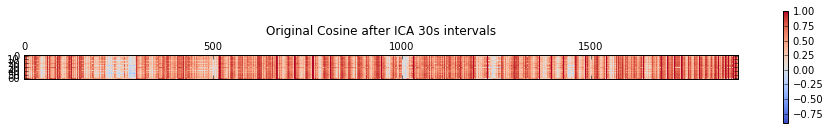

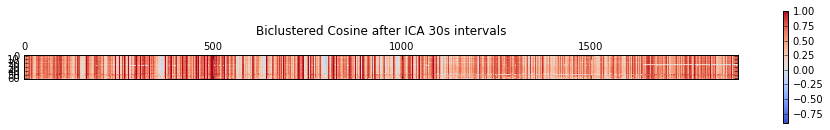

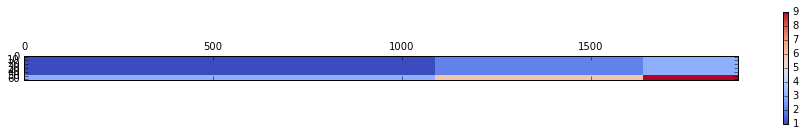

In [7]:
post_process_data = np.array(channels_data)
spectral_model = SpectralBiclustering()
spectral_model.fit(post_process_data)
fit_data = post_process_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(post_process_data, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Original Cosine after ICA 30s intervals\n')
plt.savefig('../media/json/cosine/ICA/cos_ICA_30s.png')
plt.matshow(fit_data, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Biclustered Cosine after ICA 30s intervals\n')
plt.savefig('../media/json/cosine/ICA/cos_ICA_bicluster_30s.png')
plt.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.coolwarm)
plt.colorbar()

In [8]:
import json as simplejson
with open('../media/json/cosine/ICA/ICA-cos-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('../media/json/cosine/ICA/fitted-indices-ICA-cos-30s_float.json', 'w+') as f:
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': indices_matrix}))

# with open('C:\Users\Fioger\Desktop\eeg-viz\postprocess/pearson/z_score/z_score_pearson_30s_dump.dump', 'wb') as f:
#     cPickle.dump(channels_data, f)